In [ ]:
from google.colab import drive 
drive.mount('/content/mnt')

Mounted at /content/mnt


# type

In [ ]:
!cp /content/mnt/MyDrive/tmp/plant1.zip ./

In [ ]:
!ls -al 

total 222548
drwxr-xr-x 1 root root      4096 Jan 12 08:04 .
drwxr-xr-x 1 root root      4096 Jan 12 07:54 ..
drwxr-xr-x 4 root root      4096 Jan  7 14:33 .config
drwx------ 5 root root      4096 Jan 12 08:04 mnt
-rw------- 1 root root 227862692 Jan 12 08:04 plant1.zip
drwxr-xr-x 1 root root      4096 Jan  7 14:33 sample_data


In [ ]:
!unzip plant1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: plant1/test/03/CR011_03_11170443.jpg  
  inflating: plant1/test/03/CR011_03_11170445.jpg  
  inflating: plant1/test/03/CR011_03_11170448.jpg  
  inflating: plant1/test/03/CR011_03_11170449.jpg  
  inflating: plant1/test/03/CR011_03_11170450.jpg  
  inflating: plant1/test/03/CR011_03_11170454.jpg  
  inflating: plant1/test/03/CR011_03_11170455.jpg  
  inflating: plant1/test/03/CR011_03_11170463.jpg  
  inflating: plant1/test/03/CR011_03_11170466.jpg  
  inflating: plant1/test/03/CR011_03_11170467.jpg  
  inflating: plant1/test/03/CR011_03_11170469.jpg  
  inflating: plant1/test/03/CR011_03_11170470.jpg  
  inflating: plant1/test/03/CR011_03_11170472.jpg  
  inflating: plant1/test/03/CR011_03_11170478.jpg  
  inflating: plant1/test/03/CR011_03_11170481.jpg  
  inflating: plant1/test/03/CR011_03_11170482.jpg  
  inflating: plant1/test/03/CR011_03_11170488.jpg  
  inflating: plant1/test/03/CR011_03_11170491.jpg  
  inflating: plant1/test/03/

31801344/31790344 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 17,663,491
Non

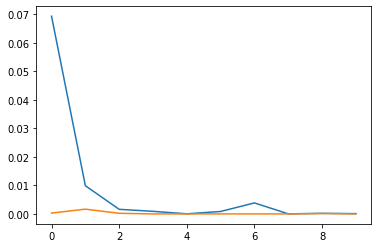

55/55 [==============================] - 11s 204ms/step - loss: 2.5457e-06 - acc: 1.0000
loss= 2.5457118226768216e-06
acc= 1.0


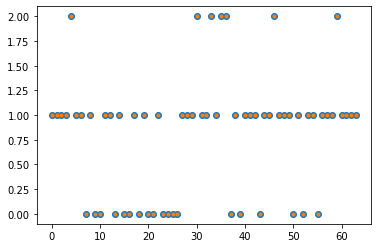

label category index = 1.0
predicted category index = 1
predicted category name = 03


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax')) #<----------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant1/train", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant1/test", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [ ]:
model.save("plant_type_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# 식물 종류 이름 찾아두기

In [ ]:
plant_type_names = list(test_data_generator.class_indices.keys())
print(plant_type_names)

['02', '03', '04']


# 식물 종류 파일 읽기

(224, 224, 3)


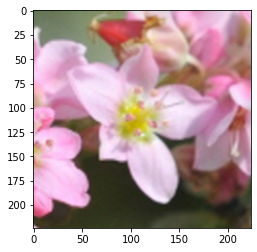

In [ ]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

im = pilimg.open('CR009_02_50381.jpg') #<---------
#im = pilimg.open('iris1.jpeg') #<---------
im = im.resize((224,224))

test_image = np.array(im)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

# 예측과 출력1

In [ ]:
from tensorflow.python.keras.models import load_model
loaded_model = load_model("plant_type_model.h5")

In [ ]:
THRESHOLD = 0.998

test_data = test_image.reshape((1, 224, 224, 3))
y_ = loaded_model.predict(test_data)
predicted_index = np.argmax(y_, axis=-1)[0]
confidence = y_[0][predicted_index]

if (confidence > THRESHOLD):
  print("predicted as {} with confidence {}".format(plant_type_names[predicted_index], confidence))
else:
  print("unknown. confidence = {}".format(confidence))

predicted as 02 with confidence 1.0


# 꽃

In [ ]:
!cp /content/mnt/MyDrive/tmp/plant2.zip ./

In [ ]:
!ls -al 

total 615660
drwxr-xr-x 1 root root      4096 Jan 12 08:56 .
drwxr-xr-x 1 root root      4096 Jan 12 07:54 ..
drwxr-xr-x 4 root root      4096 Jan  7 14:33 .config
-rw-r--r-- 1 root root     40506 Jan 12 08:21 CR009_02_50381.jpg
drwx------ 5 root root      4096 Jan 12 08:04 mnt
drwxr-xr-x 4 root root      4096 Jan 12 08:04 plant1
-rw------- 1 root root 227862692 Jan 12 08:04 plant1.zip
-rw------- 1 root root 229534048 Jan 12 08:56 plant2.zip
-rw-r--r-- 1 root root 172960032 Jan 12 08:20 plant_type_model.h5
drwxr-xr-x 1 root root      4096 Jan  7 14:33 sample_data


In [ ]:
!unzip plant2.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: plant2/02/train/046/CR046_02_50686.jpg  
  inflating: plant2/02/train/046/CR046_02_50697a.jpg  
  inflating: plant2/02/train/046/CR046_02_50702a.jpg  
  inflating: plant2/02/train/046/CR046_02_50714.jpg  
  inflating: plant2/02/train/046/CR046_02_50715.jpg  
  inflating: plant2/02/train/046/CR046_02_50721a.jpg  
  inflating: plant2/02/train/046/CR046_02_50722.jpg  
  inflating: plant2/02/train/046/CR046_02_50722a.jpg  
  inflating: plant2/02/train/046/CR046_02_50730a.jpg  
  inflating: plant2/02/train/046/CR046_02_50731.jpg  
  inflating: plant2/02/train/046/CR046_02_50732.jpg  
  inflating: plant2/02/train/046/CR046_02_50736a.jpg  
  inflating: plant2/02/train/046/CR046_02_50736b.jpg  
  inflating: plant2/02/train/046/CR046_02_50737.jpg  
  inflating: plant2/02/train/046/CR046_02_50738.jpg  
  inflating: plant2/02/train/046/CR046_02_50740.jpg  
  inflating: plant2/02/train/046/CR046_02_50740a.jpg  
  inflating: plant2/02/train/046/CR046

# 꽃 구분하는 모델링

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_1 (Flatten)         (None, 68992)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 25,433,086
Trainable params: 17,664,005
Non-trainable params: 7,769,081
__________________________________

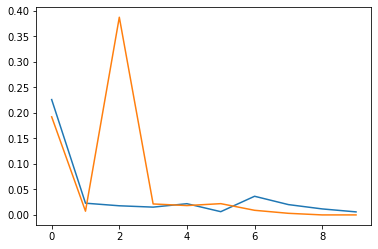

17/17 [==============================] - 3s 191ms/step - loss: 2.5131e-05 - acc: 1.0000
loss= 2.5130852009169757e-05
acc= 1.0


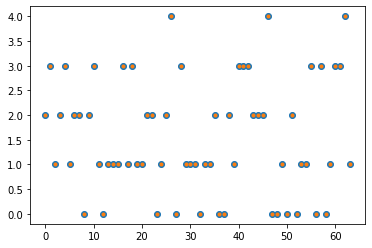

label category index = 2.0
predicted category index = 2
predicted category name = 041


In [ ]:
preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) #<----------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant2/02/train", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant2/02/test", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [ ]:
model.save("flower_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# 꽃 이름 찾아두기

In [ ]:
flower_names = list(test_data_generator.class_indices.keys())
print(flower_names)

['009', '022', '041', '046', '048']


# 꽃 파일 읽기

(224, 224, 3)


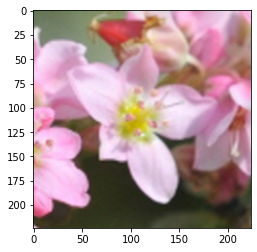

In [ ]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

im = pilimg.open('CR009_02_50381.jpg') #<---------
#im = pilimg.open('iris1.jpeg') #<---------
im = im.resize((224,224))

test_image = np.array(im)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

# 예측과 출력2

In [ ]:
from tensorflow.python.keras.models import load_model
loaded_model = load_model("flower_model.h5")

In [ ]:
THRESHOLD = 0.998

test_data = test_image.reshape((1, 224, 224, 3))
y_ = loaded_model.predict(test_data)
predicted_index = np.argmax(y_, axis=-1)[0]
confidence = y_[0][predicted_index]

if (confidence > THRESHOLD):
  print("predicted as {} with confidence {}".format(flower_names[predicted_index], confidence))
else:
  print("unknown. confidence = {}".format(confidence))

predicted as 009 with confidence 0.9999997615814209


# 열매

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_2 (Flatten)         (None, 68992)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 25,433,857
Trainable params: 17,664,776
Non-trainable params: 7,769,081
__________________________________

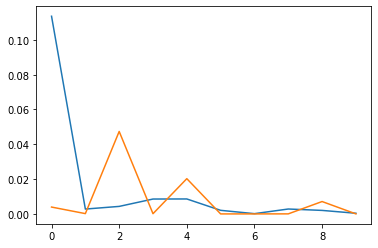

32/32 [==============================] - 7s 206ms/step - loss: 1.7631e-05 - acc: 1.0000
loss= 1.7630769434617832e-05
acc= 1.0


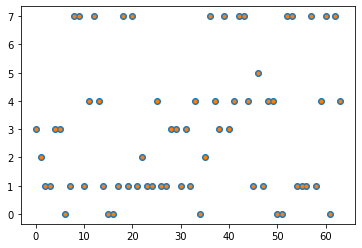

label category index = 3.0
predicted category index = 3
predicted category name = 020


In [ ]:
preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='softmax')) #<----------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant2/03/train", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant2/03/test", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [ ]:
model.save("fruit_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# 열매 이름 찾아두기

In [ ]:
fruit_names = list(test_data_generator.class_indices.keys())
print(fruit_names)

['001', '002', '011', '020', '040', '043', '046', '153']


# 열매 파일 읽기

(224, 224, 3)


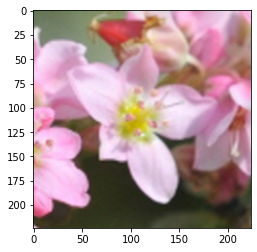

In [ ]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

im = pilimg.open('CR009_02_50381.jpg') #<---------
#im = pilimg.open('iris1.jpeg') #<---------
im = im.resize((224,224))

test_image = np.array(im)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

# 예측과 출력3

In [ ]:
from tensorflow.python.keras.models import load_model
loaded_model = load_model("fruit_model.h5")

In [ ]:
THRESHOLD = 0.998

test_data = test_image.reshape((1, 224, 224, 3))
y_ = loaded_model.predict(test_data)
predicted_index = np.argmax(y_, axis=-1)[0]
confidence = y_[0][predicted_index]

if (confidence > THRESHOLD):
  print("predicted as {} with confidence {}".format(fruit_names[predicted_index], confidence))
else:
  print("unknown. confidence = {}".format(confidence))

unknown. confidence = 0.9355310201644897


# 잎

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_3 (Flatten)         (None, 68992)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 25,432,315
Trainable params: 17,663,234
Non-trainable params: 7,769,081
__________________________________

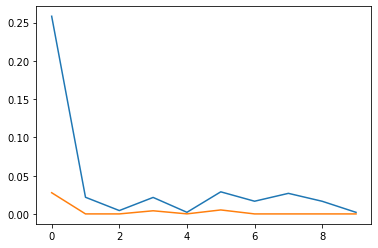

6/6 [==============================] - 1s 190ms/step - loss: 3.2447e-08 - acc: 1.0000
loss= 3.244742785568633e-08
acc= 1.0


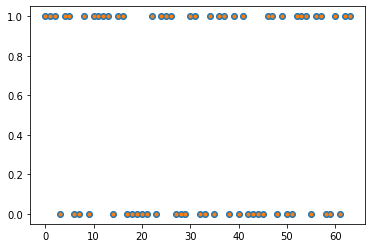

label category index = 1.0
predicted category index = 1
predicted category name = 009


In [ ]:
preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax')) #<----------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant2/04/train", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "plant2/04/test", #<---------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [ ]:
model.save("leaf_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# 잎 이름 찾아두기

In [ ]:
leaf_names = list(test_data_generator.class_indices.keys())
print(leaf_names)

['004', '009']


# 잎 파일 읽기

(224, 224, 3)


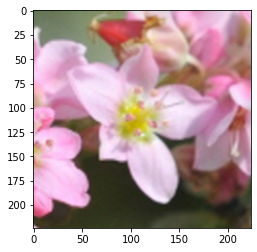

In [ ]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

im = pilimg.open('CR009_02_50381.jpg') #<---------
#im = pilimg.open('iris1.jpeg') #<---------
im = im.resize((224,224))

test_image = np.array(im)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

# 예측과 출력4

In [ ]:
from tensorflow.python.keras.models import load_model
loaded_model = load_model("leaf_model.h5")

In [ ]:
THRESHOLD = 0.998

test_data = test_image.reshape((1, 224, 224, 3))
y_ = loaded_model.predict(test_data)
predicted_index = np.argmax(y_, axis=-1)[0]
confidence = y_[0][predicted_index]

if (confidence > THRESHOLD):
  print("predicted as {} with confidence {}".format(leaf_names[predicted_index], confidence))
else:
  print("unknown. confidence = {}".format(confidence))

unknown. confidence = 0.9165616631507874
